## Question 1
*Why Gaussian form of the likelihood is a sensible choice? What does it mean that we have chosen a spherical covariance matrix for the likelihood?*

- - -

The Gaussian form is sensible because we assume that our input data is normally distributed, and in the real world this is often the case. The Central Limit Theorem states that the input is sufficiently large, the random variables become normally distributed.

A spherical covariance matrix means that the matrix is proportional to the identity matrix, such that a variable does not depend on any other variable but itself.

## Question 2
*If we do not assume that the data points are independent how would the likelihood look then? Remember that Y = [y1, . . . , yN ]*

- - -

If the data points are not indpendent, we need to use the product rule:

\begin{equation}
p(\boldsymbol{Y} \mid f, \boldsymbol{X}) = p(y_1 \mid x_1, f) \cdot p(y_2 \mid x_1, x_2, f) \cdot ... \cdot p(y_n \mid x_1, ..., x_n, f)
\end{equation}


## Question 3
*What is the form of the likelihood above, complete the right-hand side of the expression.*

- - -

From Bishop (3.10):
\begin{equation}
p(Y \mid X,W) = \prod_{n=1}^N \mathcal{N}(y_n \mid \boldsymbol{\boldsymbol{WX}}_n, \sigma^2\boldsymbol{I})
\end{equation}

## Question 4
*Explain the concept of conjugate distributions. Why is this a motivated choice?*

- - -

If the prior and the posterior distribution are in the same family of distributions, the prior and posterior are called conjugate distributions and the prior is a conjugate prior for the likelihood function. So for example, if the likelihood function is a Gaussian, choosing a prior that is also a Gaussian distribution will result in a posterior distribution that is Gaussian. This is a convenient and leads to a simplified, closed-form expression for the posterior since we can determine what functional form it will have.

## Question 5
*The prior in Eq.8 is a spherical Gaussian. This means that the “preference” is
encoded in terms of a L2 distance in the space of the parameters. With this view, how would the
preference change if the preference was rather encoded using a L1 norm? Compare and discuss
the different type of solutions these two priors would encode.*

- - -
If the preference was encoded using the L1 norm, the prior has a Laplace distribution. It leads to a sparse solution where parameters drop toward zero, since it has a preferences for values near the mean. This is also known as the Lasso. On the other hand, the L-2 norm can have many weights with low values, but not exactly zero. 

The classic illustration of these two norms can be seen in the image below with L2 and L1 norm respectively:

![L2 norm and L1 norm respectively](./l1l2norm.png)

In our case, we want to error to be as little as possible, and the L1 norm is never shorter than the L2 norm.

## Question 6
*Derive the posterior over the parameters. Please, do these calculations by hand
as it is very good practice. However, in order to pass the assignment you only need to outline
the calculation and highlight the important steps. For simplicity, please make derivations for a
single output variable y. Otherwise, you would have to apply vectorization techniques.*

- *Why does it have the form that it does?*
- *What is the effect of the constant Z, are we interested in this?*

- - -

$$\mathcal{N} (\boldsymbol{\mu, \Sigma}) \propto exp \Big\{ - \frac{1}{2}\boldsymbol{X^T}\Sigma^{-1}\boldsymbol{X}\Big\} exp \Big\{ \boldsymbol{X^T}\Sigma^{-1}\mu\Big\} exp \Big\{ - \frac{1}{2} \mu^T \Sigma^{-1} \mu \Big\}$$


### The prior — $p(\boldsymbol{w})$

\begin{equation}
\mathcal{N}(\boldsymbol{w}_0, \tau^2\boldsymbol{I}) = \frac{1}{\sqrt[]{2\tau^2\pi}}\exp\Big\{-\frac{1}{2\tau^2}(\boldsymbol{w}-\boldsymbol{w}_0)^T(\boldsymbol{w}-\boldsymbol{w}_0)\Big\}
\end{equation}


### The likelihood — $p(y \mid \boldsymbol{w}, \boldsymbol{x})$
\begin{equation}
\mathcal{N}(\boldsymbol{x}\boldsymbol{w}, \sigma^2\boldsymbol{I}) = \frac{1}{\sqrt[]{2\sigma^2\pi}}\exp\Big\{-\frac{1}{2\sigma^2}(y-\boldsymbol{x}\boldsymbol{w})^T(y-\boldsymbol{x}\boldsymbol{w})\Big\}
\end{equation}

### The posterior — $p(\boldsymbol{w} \mid \boldsymbol{x}, y)$

\begin{equation}
\mathcal{N}(\mu \mid \Sigma) = \frac{1}{\sqrt[]{2\sigma^2\pi}}\exp\Big\{-\frac{1}{2}(\boldsymbol{w} - \mu)^T\Sigma^{-1}(\boldsymbol{w} - \mu)\Big\}
\end{equation}

We can now write the posterior:

\begin{align}
p(\boldsymbol{w} \mid \boldsymbol{x}, y) \propto p(y \mid \boldsymbol{w}, \boldsymbol{x}) p(\boldsymbol{w})
\\
= \frac{1}{\sqrt{2\sigma^2\pi}}\exp{\{-\frac{1}{2\sigma^2}(y-\boldsymbol{x}\boldsymbol{w})^T(y-\boldsymbol{x}\boldsymbol{w})\}\frac{1}{\sqrt{2\sigma^2\pi}}\exp{\{-\frac{1}{2\tau^2}(\boldsymbol{w}-\boldsymbol{w}_0)^T(\boldsymbol{w}-\boldsymbol{w}_0)\}}} \\
= \Big\{ \text{drop the constants} \Big\}\\
= \exp{\{-\frac{1}{2\sigma^2}(y-\boldsymbol{x}\boldsymbol{w})^T(y-\boldsymbol{x}\boldsymbol{w}) -\frac{1}{2\tau^2}(\boldsymbol{w}-\boldsymbol{w}_0)^T(\boldsymbol{w}-\boldsymbol{w}_0)\}} \\
\end{align}

Looking at the exponent, we have:
\begin{align}
\frac{1}{2\sigma^2}[\boldsymbol{w}^T\boldsymbol{w} - 2\boldsymbol{w}^T\boldsymbol{w}_0 + \boldsymbol{w}_0^T\boldsymbol{w}_0] - \frac{1}{2\tau^2}[\boldsymbol{x}^T \boldsymbol{x} \boldsymbol{w}^T \boldsymbol{w} - 2y(\boldsymbol{x}\boldsymbol{w}) + y^2]
\end{align}

We complete the squares:

\begin{equation}
\text{quadratic in $\boldsymbol{w}$}
\begin{cases}
\frac{\boldsymbol{w}^T\boldsymbol{w}}{2\tau^2} + \frac{\boldsymbol{x}^T\boldsymbol{x}\boldsymbol{w}^T\boldsymbol{w}}{2\sigma^2} = \frac{\boldsymbol{w}^T\Sigma^{-1}\boldsymbol{w}}{2}
\end{cases}
\\
\text{linear in $\boldsymbol{w}$}
\begin{cases}
\frac{\boldsymbol{w}^T\boldsymbol{w}_0}{\tau^2} + \frac{y\boldsymbol{x}^T\boldsymbol{w}}{\sigma^2} = \boldsymbol{w}^T\Sigma^{-1}\mu
\end{cases}
\\
\text{constant in $\boldsymbol{w}$}
\begin{cases}
\frac{\boldsymbol{w}_0^T\boldsymbol{w}_0}{2\tau^2} + \frac{y^2}{2\sigma^2} = \frac{\mu^T\Sigma^{-1}\mu}{2}
\end{cases}
\end{equation}

From the quadratic term we can find the $\Sigma^{-1}$ of the posterior:

\begin{equation}
\Sigma^{-1} = \frac{\boldsymbol{x}^T\boldsymbol{x}}{\sigma^2} + \frac{1}{\tau^2}
\end{equation}

From the linear term, by replacing $\Sigma^{-1}$, we find $\mu$:

\begin{equation}
\mu = (\frac{\boldsymbol{x}^T\boldsymbol{x}}{\sigma^2}+\frac{1}{\tau^2})^{-1} (\frac{y\boldsymbol{x}}{\sigma^2} + \frac{\boldsymbol{w_0}}{\tau^2})
\end{equation}

Finally, writing $\frac{1}{\tau^2} = \Sigma_p^{-1}$:

$$p(\boldsymbol{w} \mid \boldsymbol{x}, y) = \mathcal{N} \Big ( \frac{1}{\sigma^2}(\frac{1}{\sigma^2}\boldsymbol{x}^T\boldsymbol{x} + \Sigma_p^{-1})^{-1}) \boldsymbol{x}^Ty, (\frac{1}{\sigma^2}\boldsymbol{x^T}\boldsymbol{x} + \Sigma_p^{-1})^{-1}\Big)$$
- - -

- The effect of the constant Z is to normalize the probabilities so that they sum to 1.

## Question 7
*What is a non-parametric model and what is the difference between non-parametrics
and parametrics? In specific discuss these two aspects of non-parametrics:*

- *Representability?*
- *Interpretability?*

- - -

I think the name non-parametric model is an unfortunate misnomer. A non-parametric model can, just like a parametric model, have parameters, but these will concern the model complexity rather than the distribution. 
In contrast to the parametric model, the non-parametric model does not assume a specific form of distribution. Assumptions can be represented by variables such as the mean and variance. 


Parametric models are easier to interpret, but might lead to a model that does a poor job of representing the data. For example, with a parametric model we can never represent data whose complexity is larger than we presume.
Non-parametric models can usually represent the data better since the models can be arbitrarily complex. Non-parametric models can also use the kernel trick to represent data in higher dimensions. This also makes non-parametric models much harder to interpret.

## Question 8
*Explain what this prior does? Why is it a sensible choice? Use images to show
your reasoning. Clue: use the marginal distribution to explain the prior*

- - -

$$p(f \mid \boldsymbol{X}, \theta) = \mathcal{N}(0, k(\boldsymbol{X, X}))$$

The prior allows us to express uncertainty in the choice of $f$. The covariance (kernel function) says that for similar values of $\boldsymbol{x}$, the output $\mathcal{f}$ will be similar. For the assignment, we used the squared exponential kernel. The mean assumes that the values of $f$ will distributed around 0. The prior is sensible choice because it means that we can define points nearby each other to be highly correlated, which will strengthen our confidence as we see more data. Similarly, we can express that points that are far away from each other will have low correlation. In a sense it's telling us that we are confident in areas with a lot of data, and unsure in areas where we have little or no data. Moreover, it's flexible since $\theta$ allows us to specify how much or how little the variables should correlate.

# Question 9
Formulate the joint likelihood of the full model that you have defined above,
$$p(\boldsymbol{Y, X}, f, θ)$$

Try to draw a very simple graphical model to clearly show the assumptions that you have made.

- - -

First we use the product rule:

\begin{equation}
p(\boldsymbol{Y}, \boldsymbol{X}, f, \theta) = \underbrace{p(\boldsymbol{Y} \mid \boldsymbol{X}, f, \theta) p(\boldsymbol{X} \mid f, \theta) p(f \mid \theta) p(\theta)}_{\text{product rule}}
\end{equation}

We make the assumption that $\boldsymbol{Y}$ is independent of $\boldsymbol{X}$ and $\theta$ given $f$.

\begin{equation}p(\boldsymbol{Y} \mid f) p(f \mid \boldsymbol{X}, \theta) p(\boldsymbol{X})p(\theta) \implies \underbrace{p(\boldsymbol{Y} \mid \boldsymbol{X}, f)}_{\text{model assumption}}
\end{equation}

In [1]:
import daft
pgm = daft.PGM([2, 2.], origin=[0, 0], grid_unit=[2,3])

# Hierarchical parameters.
pgm.add_node(daft.Node("X", r"$X$", 0.5, 1.5))
pgm.add_node(daft.Node("theta", r"$\theta$", 1.5, 1.5))
pgm.add_node(daft.Node("f", r"$f$", 1, 1))
pgm.add_node(daft.Node("Y", r"$Y$", 1, 0.3))

# Add in the edges.
pgm.add_edge("theta", "f")
pgm.add_edge("X", "f")
pgm.add_edge("f", "Y")

# Render and save.
pgm.render()

## Question 10
*Explain the marginalisation in Eq.12,*
- *Explain how this connects the prior and the data?*
- *How does the uncertainty “filter” through this?*
- *What does it imply that θ is left on the left-hand side of the expression after marginalisation?*

- - -

$$p(\boldsymbol{Y} \mid \boldsymbol{X}, \theta) = \int p(\boldsymbol{Y} \mid \mathcal{f})p(f \mid \boldsymbol{X}, θ)d\mathcal{f}$$

By marginalizing, we are dropping $\mathcal{f}$. The prior is connected to the data since $\mathcal{f}$ is dependent on $\boldsymbol{X}$ and $\theta$, and after marginalizing, $\boldsymbol{Y}$ is directly dependent on $\boldsymbol{X}$ and $\theta$.

The uncertainty is "filtered" or "propagated" through the prior by integrating all values of the possible functions $\mathcal{f}$. The uncertainty of $p(\boldsymbol{Y} \mid f)$ is now expressed by $p(\boldsymbol{Y} \mid \boldsymbol{X}, \theta)$. The more sure we are of the prior, the more data we will need to "correct" the posterior.

We keep $\theta$ on the left-hand side, since the distribution will still depend on it. We keep it as a hyperparameter to be able to tweak our model.

In [2]:
%matplotlib inline  
import seaborn as sns
sns.set(style="dark")
import numpy as np
from numpy import dot
from numpy.linalg import inv, pinv
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

## Question 11
***
1. Visualise the prior distribution over W.
1. Pick a single data-point from the data and visualise the posterior distribution over W.
1. Sample from the posterior and show a couple of functions.
1. Repeat 2 − 3 by adding additional data points.

Describe the plots and the behavior when adding more data? Is this a desirable behavior?
***

The prior distribution over $\boldsymbol{W}$ is:

$$p(\boldsymbol{W}) = \mathcal{N}(W_0, \tau^2\boldsymbol{I})$$

We have no prior information about the mean and covariance, so we can set $\boldsymbol{\mu} = (0, 0)$ as it is convenient and symmetrical. Being Bayesian, we can express uncertainty by assuming a large covariance matrix:

$$\Sigma = \begin{bmatrix}10^2 & 0 \\ 0 & 10^2\end{bmatrix}$$

which means high variance and implies that we have no strong beliefs. By letting $\Sigma$ be a diagonal matrix, we are also assuming independence between the variables. In the particular case of this assignment, a large covariance like this leads to slower convergence, but we can be sure that the data has "spoken for itself".



In [3]:
def get_y(X, W, epsilon=True):
    if epsilon:
        epsilon = np.random.normal(0, 0.3, len(X)).reshape(-1,1)
    return np.dot(X, W.T) + epsilon

def visualize(distribution, ax=None, nbins=200):
    cmap = sns.cubehelix_palette(start=4, light=1, as_cmap=True)
    sns.kdeplot(distribution[:,0], distribution[:,1], cmap=cmap, shade=True, cut=5, ax=ax)

def get_posterior_mean(X, Y, sigma, cov):
    return 1./(sigma**2) * dot(inv(1./(sigma**2) * dot(X.T, X) + inv(cov)), np.dot(X.T, Y)).reshape(-1)

def get_posterior_sigma(X, sigma, cov):
    return inv(1./(sigma**2) * dot(X.T, X) + inv(cov))

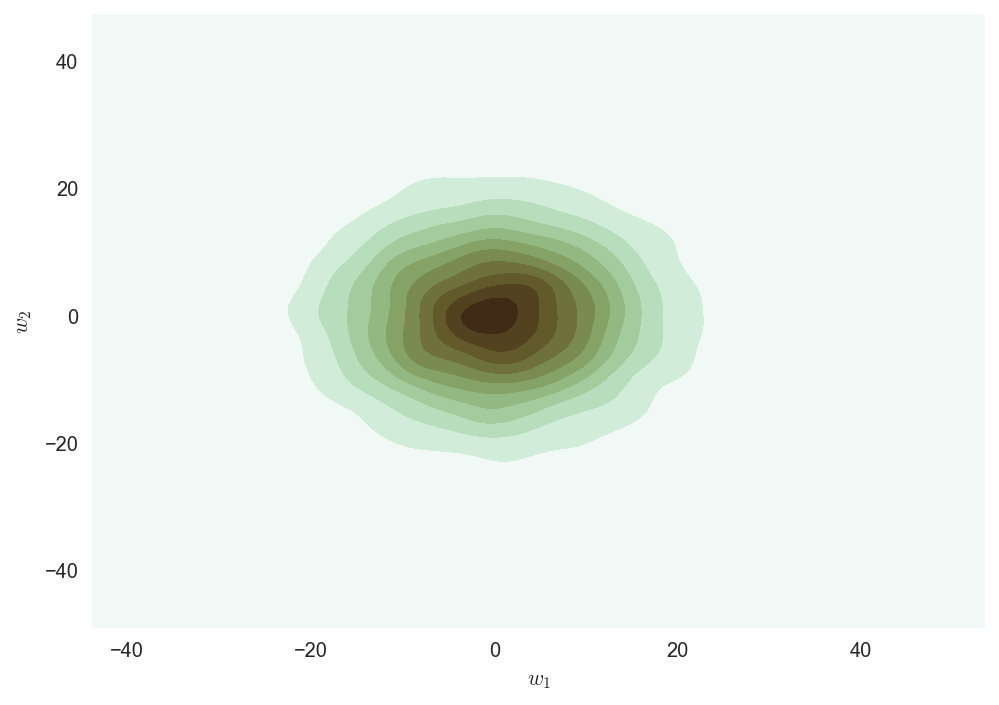

In [4]:
mu = [0, 0]
cov = np.eye(2) * 10**2
sigma = 1
wPrior = np.random.multivariate_normal(mu, cov, 10000)
#fig = plt.figure()
#ax = fig.add_axes([-1, 1, -1, 1])
fig = visualize(wPrior, ax=plt)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
# plt.title('Prior')

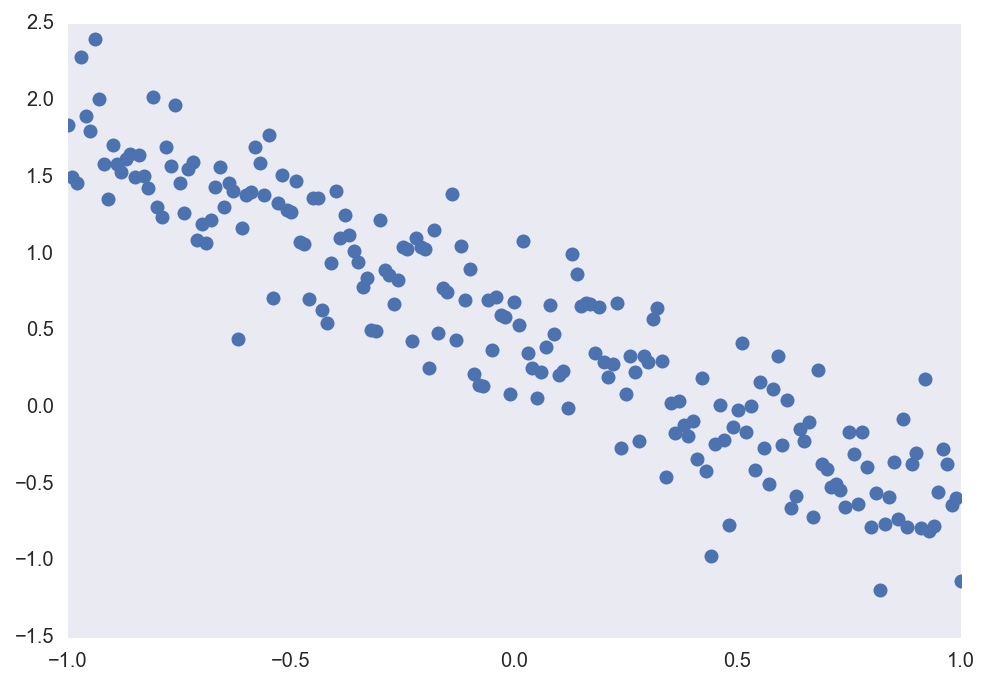

In [5]:
x = np.linspace(-1, 1, 201)
w = np.array([-1.3, 0.5])
X = np.ones((len(x), 2))
W = w.reshape(1,2)
X[:,0] = x
Y = get_y(X, W)
plt.plot(x,Y,'o')
# plt.title('Data')

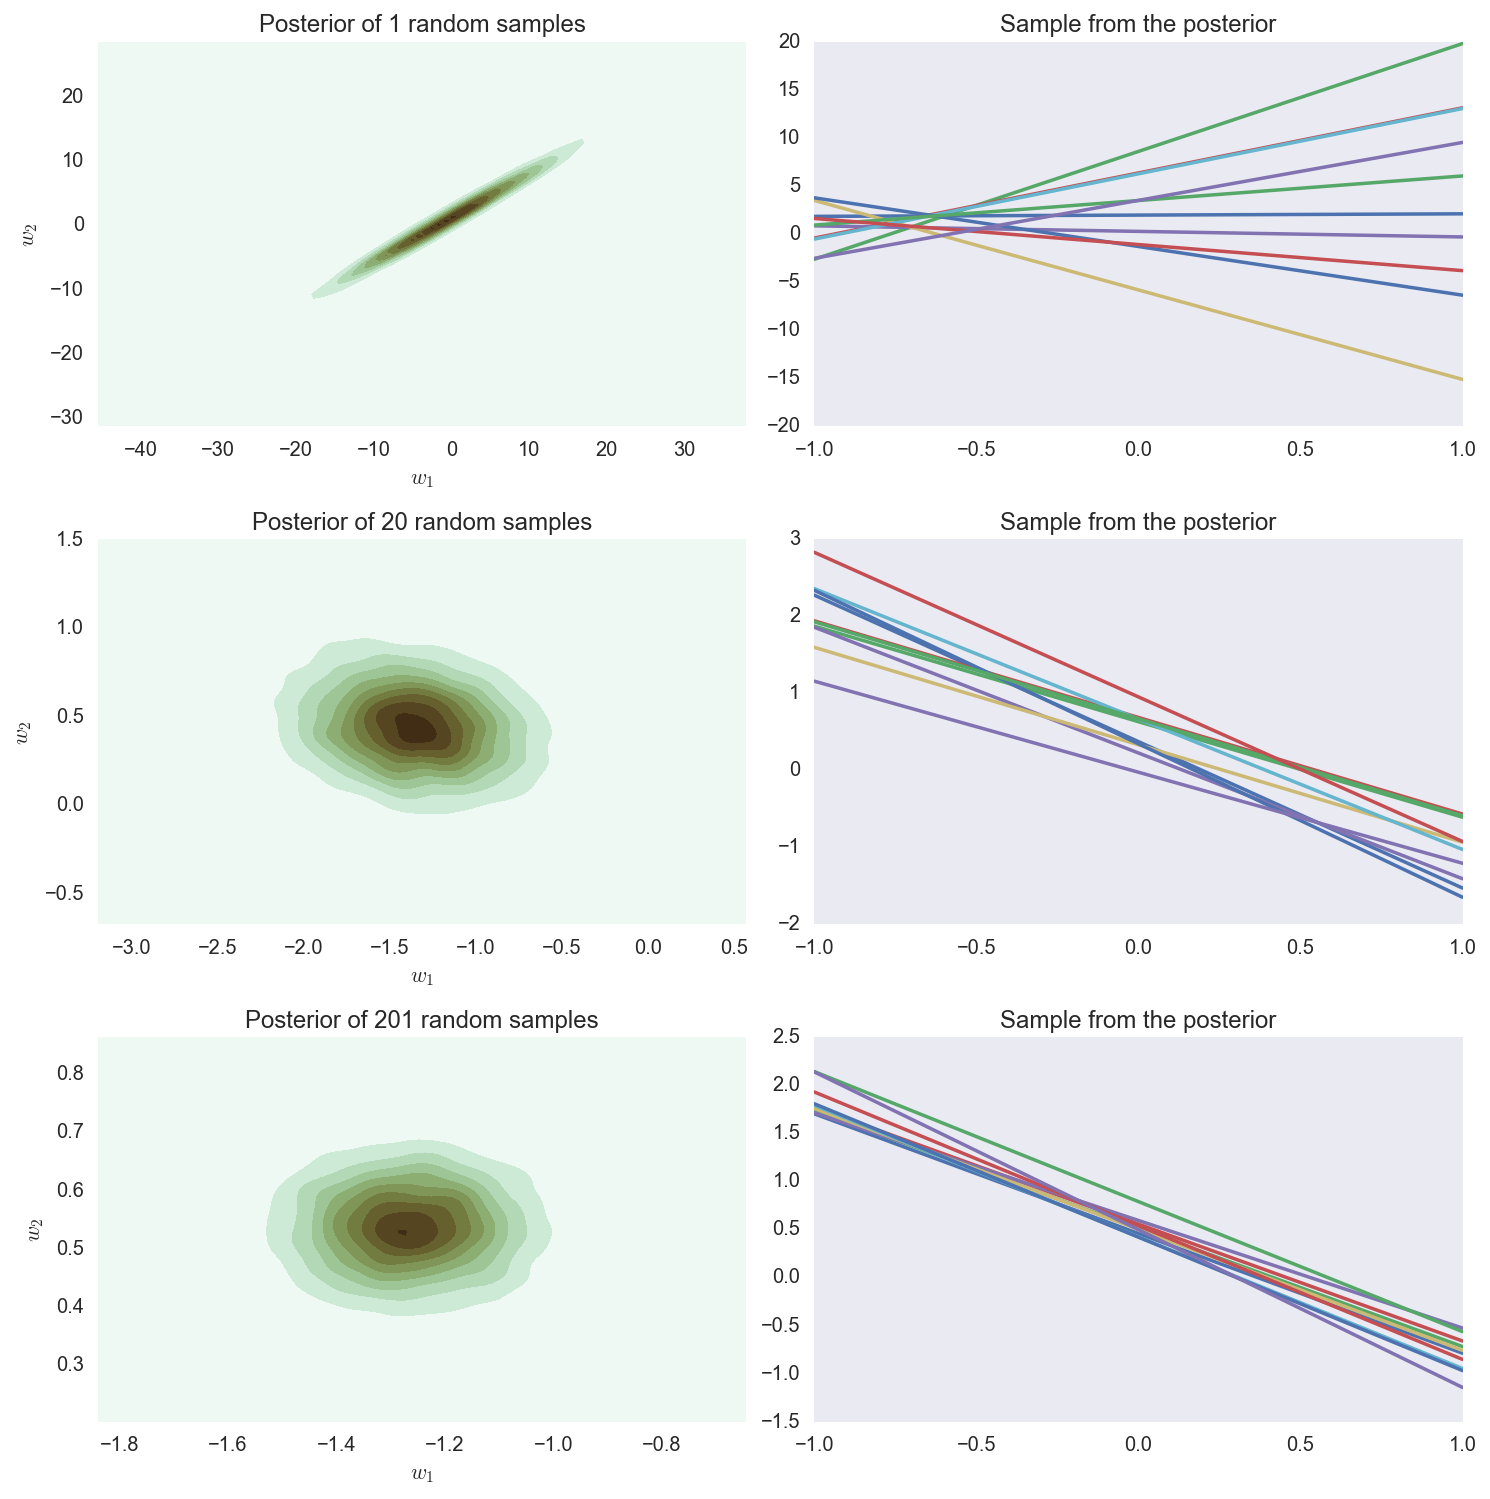

In [6]:
nr_samples = [1, 20, len(X)]
shuffled_idx = np.random.permutation(len(X))
fig, axarr = plt.subplots(len(nr_samples), 2, figsize=(10, 10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
for i in xrange(len(nr_samples)):
    nr = nr_samples[i]
    idx = shuffled_idx[:nr]
    samples = X[[idx]]
    labels = Y[idx]
    posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
    posterior_sigma = get_posterior_sigma(samples, sigma, cov)
    dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 10000)
    visualize(dist, ax=axarr[i,0])
    axarr[i,0].set_xlabel('$w_1$')
    axarr[i,0].set_ylabel('$w_2$')
    axarr[i,0].set_title('Posterior of %s random samples' % str(len(samples)))
    #axarr[i,0].set_xlim(-3, 3)
    #axarr[i,0].set_ylim(-3, 3)
    #plt.show()

    dist_idx = np.random.randint(0, dist.shape[0], 10)
    posterior_sample = dist[dist_idx]
    plt_idx = np.random.permutation(len(X))[0:10]
    postY = get_y(X, posterior_sample, False)
    axarr[i,1].plot(x, postY)
    axarr[i,1].set_title('Sample from the posterior')
    #axarr[i,1].set_xlabel('w1')
    #axarr[i,1].set_ylabel('w2')
    #plt.show()

In [7]:
print np.average(posterior_sample, axis=0)

[-1.32062796  0.52717105]


As we can see, by adding more samples from the data, the parameters converge toward $(-1.3, 0.5)$.

# Question 12
1. Create a GP-prior with a squared exponential co-variance function.
2. Sample from this prior and visualise the samples.
3. Show samples using different length-scale for the squared exponential.

Explain the behavior of altering the length-scale of the covariance function
- - - 

A high $l$-value means the curves are smoother. The $l$-value is a constraint between points that define how closely they correlate. A large $l$-value means that the distance between the points matters less. Changing the $l$-value does not affect the diagonal, but with a higher $l$-value, variables are highly correlated, and conversely, with a lower $l$-value, the correlation between variables fall off so that they depend less on each other, and the graph becomes wiggly. As the $l$-value approaches zero, the covariance matrix becomes closer to the identity matrix. A low $l$-value will lead to overfitting of the data, and a high value will lead to underfitting.

The plots show varying $l$-values.

In [8]:
def kernel_function(Xi, Xj, sigma, l, cov=None):
    k = sigma**2 * np.exp(-cdist(Xi, Xj, 'sqeuclidean') / l**2)
    #k += np.random.rand(k.shape[0], k.shape[1]).dot(np.eye(k.shape[0]))
    return k

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: covariance is not positive-semidefinite.


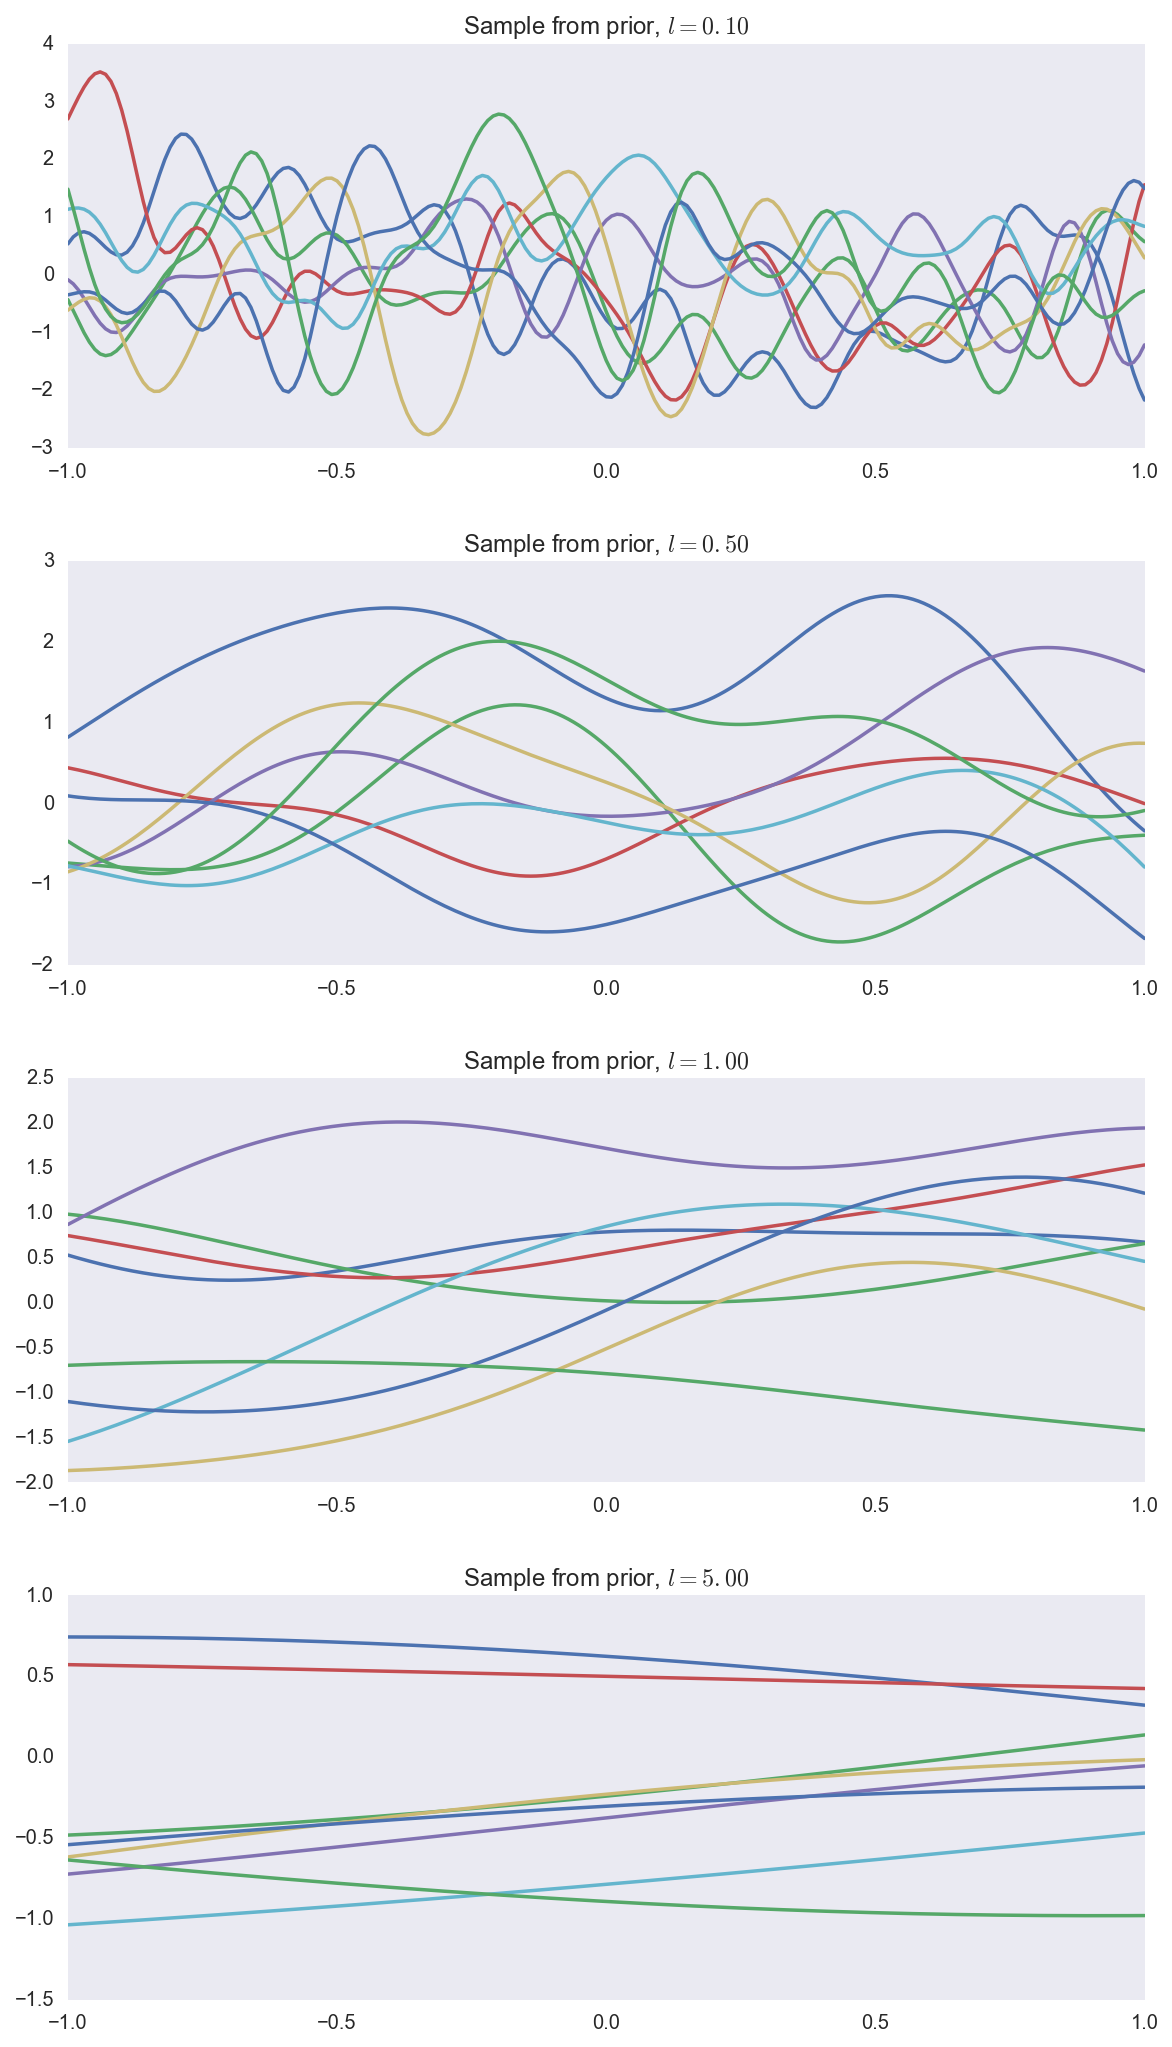

In [9]:
sigma = 1
X_GP = X
L = [0.1, 0.5, 1., 5.]
fig, axarr = plt.subplots(4,1, figsize=(8, 14));
# plt.tight_layout()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
for row in range(4):
    l = L[row]
    K_GP = kernel_function(X_GP, X_GP, sigma, l)
    mu_GP = np.zeros(len(K_GP))
    for _ in xrange(8):
        prior_dist_GP = np.random.multivariate_normal(mu_GP, K_GP)    
        axarr[row].plot(X_GP[:,0], prior_dist_GP)
        axarr[row].set_title('Sample from prior, $l = %.2f$' % l)
plt.show()

# Question 13
>The posterior and the prior are the same object if we do not have any
observed data.

Explain the above statement, why is this?

- - - 


The posterior is the probability of a certain to occur after data has been observed. The prior reflects the subjective beliefs about some phenomena. By combining the prior with evidence of gathered data, we obtain the posterior using Bayes' theorem. If the prior is uninformative, the posterior will be strongly based on data. On the other hand, if the prior is informative, the posterior will be a mixture of the prior and the data. If we don't have any data at all, the prior and the posterior will thus be the same object.

## Question 14
1. Compute the predictive posterior distribution of the model
2. Sample from this posterior with points both close to the data and far away from the observed
data.
3. Plot the data, the predictive mean and the predictive variance of the posterior from the
data.

Explain the behavior of the samples and compare the samples of the posterior with the ones from
the prior. Is this behavior desirable? What would happen if you would add a diagonal covariance
matrix to the squared exponential?

- - -

From the plots, one can see that within the range $[-\pi, ..., \pi]$, given the "right" $l$-value, the model fits the data quite well as desired. The variance increases between each point, and outside the input range the variance is wild. This is especially visible in the covariance plots, where with a low $l$-value, it's easy to distinguish the points which appear as dark spaces between areas of larger variance. With a higher $l$-value, the variance drops off between the points as the points have less and less correlation between each other. 

If we add a diagonal covariance matrix to the squared exponential, the posterior will have more variance, and the samples from the posterior will not necessarily go through the points.

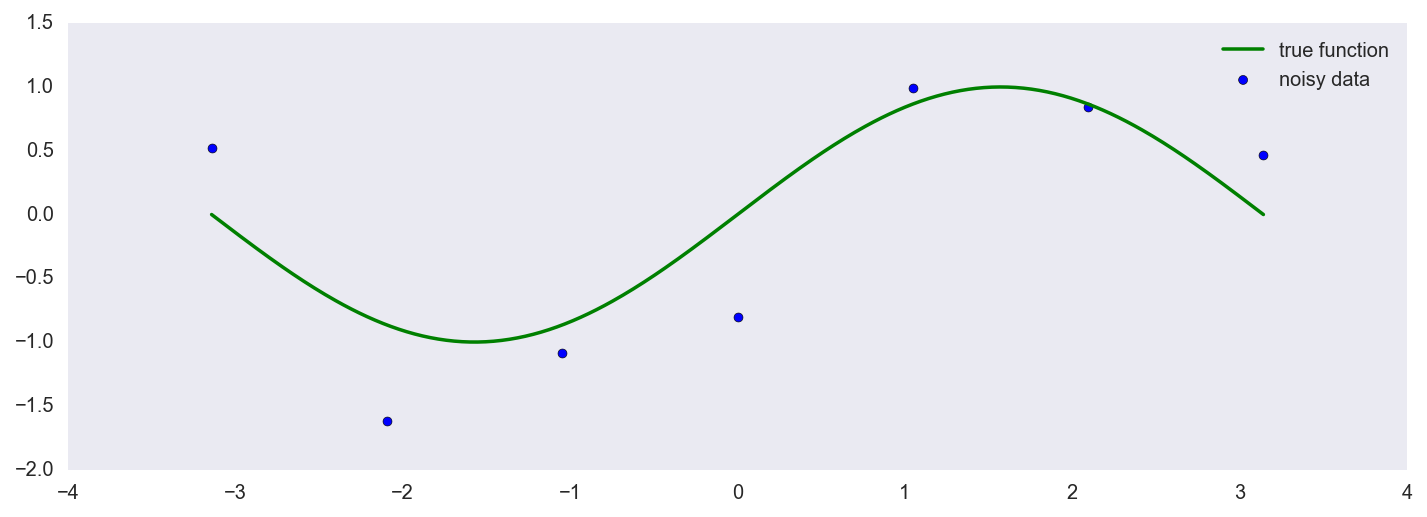

In [10]:
plt.figure(figsize=(12,4))
x_sin = np.linspace(-pi, pi, 7)
epsilon = np.random.normal(0, 0.5, len(x_sin))
y_sin = np.sin(x_sin) + epsilon
X_sin = np.zeros((len(x_sin), 2))
X_sin[:,0] = x_sin
plt.scatter(x_sin, y_sin, label='noisy data')

x_sin_true = np.linspace(-pi, pi, 400)
y_sin_true = np.sin(x_sin_true)
plt.plot(x_sin_true, y_sin_true, 'g', label='true function')
# plt.title('Underlying data & noisy scattered data')
plt.legend()

In [11]:
def get_gp_mean_cov(train, train_label, test, sigma=1, l=0.5, cov=None):
    C = kernel_function(train, train, sigma, l, cov)
    k = kernel_function(train, test, sigma, l, cov)
    c = kernel_function(test, test, sigma, l, cov)
    
    mu_gp = dot(dot(k.T, pinv(C)), train_label)
    cov_gp = c - dot(dot(k.T, pinv(C)), k)
    return mu_gp, cov_gp
    
mu_gp, cov_gp = get_gp_mean_cov(X_sin, y_sin, X_sin)
predictive_posterior = np.random.multivariate_normal(mu_gp, cov_gp)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: covariance is not positive-semidefinite.


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: covariance is not positive-semidefinite.


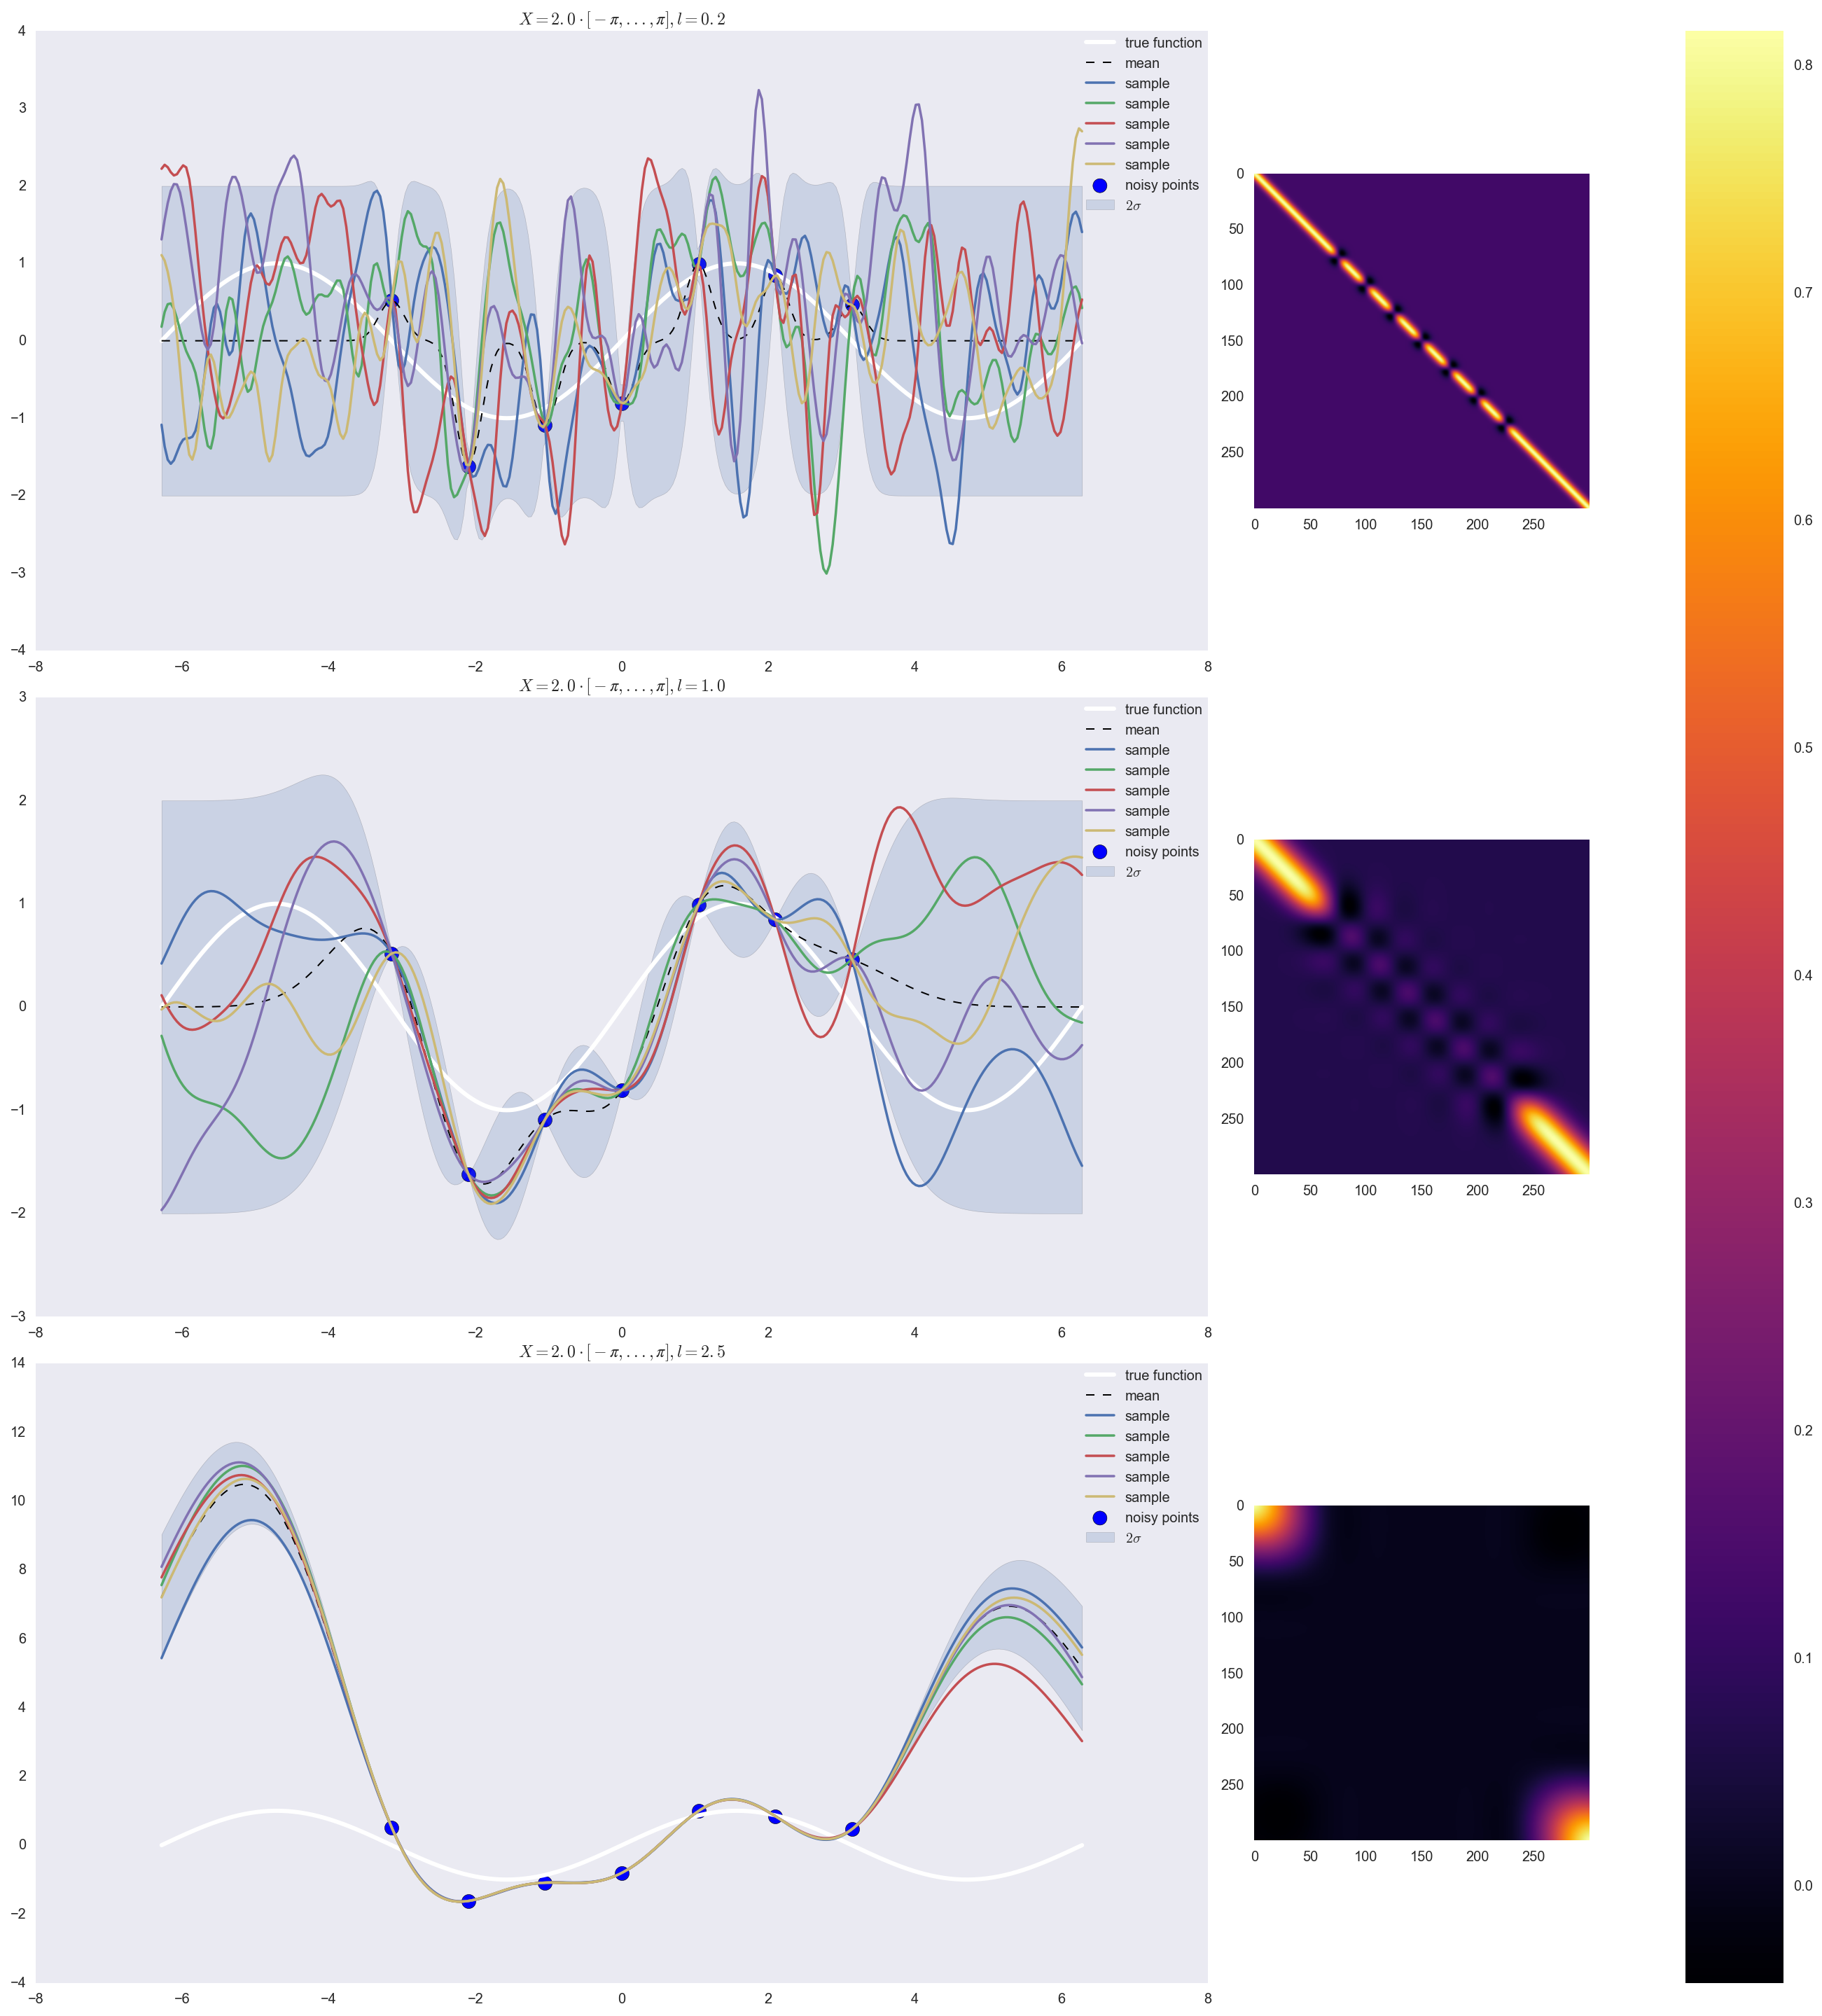

In [12]:
scale = 2
x_sin_test = np.linspace(2 * -pi, 2*pi, 300)
y_sin_true = np.sin(x_sin_test)
#print x_sin_test
L = [0.25, 1.0, 2.5]
X_sin_test = np.column_stack((x_sin_test, np.zeros(len(x_sin_test))))
rows = len(L)
cols = 2
fig, axarr = plt.subplots(rows, cols, figsize=(20, 20), gridspec_kw = {'width_ratios':[3.5, 1]});
plt.tight_layout()

cmap_name = 'inferno'
cmap = plt.get_cmap(cmap_name)
for row in xrange(rows):
    l = L[row]
    axarr[row,0].plot(x_sin_test, y_sin_true, 'w', linewidth=3, label='true function')
    axarr[row,0].set_title(u'$X = %.1f \cdot [-\u03C0, ..., \u03C0], l = %.1f$' % (scale, l))
    axarr[row,0].scatter(x_sin, y_sin, marker='o', s=100, label='noisy points')
    
    mu_gp, cov_gp = get_gp_mean_cov(X_sin, y_sin, X_sin_test, sigma=1, l=l)
    
    axarr[row,0].plot(x_sin_test, mu_gp, 'k--', linewidth=1, label='mean')
    axarr[row,0].fill_between(x_sin_test, mu_gp - 2 * np.sqrt(np.diag(cov_gp)), 
                              mu_gp + 2 * np.sqrt(np.diag(cov_gp)), alpha=0.2, label='$2\sigma$')
    
    dists = np.random.multivariate_normal(mu_gp, cov_gp, 5)
    for dist in dists:
        axarr[row,0].plot(x_sin_test, dist, label='sample')
    cax = axarr[row,1].imshow(cov_gp, cmap=plt.get_cmap(cmap_name), label='Covariance')
    axarr[row,0].legend(borderaxespad=0.)
#     cax.legend()

fig.colorbar(cax, ax=axarr.ravel().tolist())

# II The Posterior $p(\boldsymbol{X} \mid \boldsymbol{Y})$

## Question 15
Elaborate on this, why can one view a prior as encoding a preference?

- - -

A prior encodes a preference in the sense that the more informative the prior, the more data we need to change our beliefs since the posterior becomes more influenced by the prior. That is to say that we prefer a specific model more than other models. Being Bayesian, we are also allowed to marginalize a variable that we're not interested in.

## Question 16
$$p(\boldsymbol{X}) = \mathcal{N}(0, \boldsymbol{I})$$
What type of _"preference"_ does this prior encode?

- - - 

This prior encodes a preference for circular data centered around 0, possibly as an initial guess without actual information on where X is centered. The prior also says that the variables are mutually independent because of the identity matrix. 

## Question 17
Perform the marginalisation in Eq. 23 and write down the expression. As previously,
it is recommended that you do this by hand even though you only need to outline the
calculations and show the approach that you would take to pass the assignment.
Hint: The marginal can be computed by integrating out X with the use of Gaussian algebra
we exploited in the exercise derivations and, in particular, by completing the square. However it
is much easier to derive the mean and covariance, knowing that the marginal is Gaussian, from
the linear equation of Y(X).

- - -

$$p(\boldsymbol{Y} \mid \boldsymbol{W}) = \int p(\boldsymbol{Y} \mid \boldsymbol{X,W})p(\boldsymbol{X})d\boldsymbol{X}$$

We could complete the square of the exponent, but we know that the $P(\boldsymbol{Y} \mid \boldsymbol{W})$ is Gaussian since the right hand side is a linear-Gaussian model. So we only need to find the mean and covariance for $p(\boldsymbol{Y} \mid \boldsymbol{W})$. If we assume a model $y = \boldsymbol{WX} + \mu + \epsilon$, we can find the mean and covariance from their definitions.

Expected value:
$$\mathop{\mathbb{E}}[\boldsymbol{Y} \mid \boldsymbol{W}] = \mathop{\mathbb{E}}[\boldsymbol{WX} + \mu + \epsilon]
\\= \mathop{\mathbb{E}}[\boldsymbol{WX}] + \mathop{\mathbb{E}}[\mu] + \mathop{\mathbb{E}}[\epsilon] 
\\= \boldsymbol{W}\mathop{\mathbb{E}}[\boldsymbol{X}] + \mathop{\mathbb{E}}[\mu] + \mathop{\mathbb{E}[\epsilon]}$$

By assuming the noise $\epsilon$ is uncorrelated with the underlying data:

$$\implies \boldsymbol{W}\mathop{\mathbb{E}}[\boldsymbol{X}] + \mu = \mu$$

Covariance:
\begin{equation}
\begin{split}
cov(\boldsymbol{Y} \mid \boldsymbol{W, Y}) = cov(\boldsymbol{WX} + \epsilon, \boldsymbol{WX} + \epsilon) =
\\
\mathop{\mathbb{E}}[(\boldsymbol{WX} + \epsilon - \mathop{\mathbb{E}}[\boldsymbol{WX} + \epsilon])((\boldsymbol{WX} + \epsilon)^T - \mathop{\mathbb{E}}[(\boldsymbol{WX} + \epsilon)^T])] =
\\
\mathop{\mathbb{E}}[(\boldsymbol{WX} + \epsilon)(\boldsymbol{WX} + \epsilon)^T] = \mathop{\mathbb{E}}[\boldsymbol{WXX^TW^T}] + \mathop{\mathbb{E}}[\epsilon^2] = \boldsymbol{WW^T} + \sigma^2\boldsymbol{I}
\end{split}
\end{equation}

After the marginalization, $\boldsymbol{Y}$ no longer depends on $\boldsymbol{X}$.
\begin{equation}
p(\boldsymbol{Y} \mid \boldsymbol{W}) = \mathcal{N}(\boldsymbol{Y} \mid 0, \boldsymbol{WW^T} + \sigma^2\boldsymbol{I})
\end{equation}


## Question 18 - check again
Compare these three estimation procedures above in log-space.
- How are they different?
- How are MAP and ML different when we observe more data?
- Why are the two last expressions of Eq. 25 equal?

- - -

The ML estimation is in log-space:

$$\underset{\boldsymbol{W}}{argmin}_{\text{ML}} = - \frac{1}{2} \sum_{n=1}^N (\boldsymbol{W}x_n - y_n)^2$$

MAP in log-space:

$$\underset{\boldsymbol{W}}{argmin}_{\text{MAP}} = - \frac{1}{2} \sum_{n=1}^N (\boldsymbol{W}x_n - y_n)^2 - \frac{1}{2} \boldsymbol{W}^T \boldsymbol{W}$$

ML Type-II in log-space:

$$\underset{\boldsymbol{W}}{argmin}_{\text{Type-II ML}} = - \frac{N}{2} (D \cdot \log 2\pi + \log |\boldsymbol{C}| + trace(\boldsymbol{C}^{-1}S))$$

where $$\boldsymbol{C} = \boldsymbol{WW^T} + (\sigma^2 \mathcal{I}), S = \frac{1}{N} \sum_{i=1}^{N}(y_i - \mu)^2
$$

First of all, the ML approach finds the mode of the likelihood distribution, and MAP finds the mode of the posterior distribution.
In constrast to ML, MAP estimation is Bayesian in the sense that it it looks at the prior of the parameters. One advantage with MAP is that it has built-in regularization due to the uncertainty which decreases the variance and prevents overfitting. Lacking this term to penalize heavy variations, the ML estimation will tend to easily overfit when there's not so much data. However, with plenty of data, both ML and MAP will converge to the same point. The ML Type-II estimate is especially useful in some situations, since it does not depend on $\boldsymbol{X}$.

The two last expressions are equal since we can disregard the denominator when we are just looking for the $\boldsymbol{W}$ that maximizes the equation. The denominator is just a scaling factor.

## Question 19

- - -

\begin{align}
p(\boldsymbol{Y} \mid \boldsymbol{W}) = \int p(\boldsymbol{Y} \mid \boldsymbol{X,W})p(\boldsymbol{X})d\boldsymbol{X} =
\\
\frac{1}{(2 \pi)^{\frac{ND}{2}}} \frac{1}{\mid \Sigma \mid^{\frac{N}{2}}} \exp \Big\{ {\sum_{i=1}^{N}} - \frac{1}{2} y_i^T \Sigma^{-1} y_i \Big\}
\end{align}

The cost function $\mathcal{L}(\boldsymbol{W})$:

\begin{equation}
\mathcal{L}(\boldsymbol{W}) = - \log(p(\boldsymbol{Y \mid W}))
\\
= \frac{ND}{2} \log 2\pi + \frac{N}{2} \log \vert \boldsymbol{C} \vert + \sum_{i=1}^N \frac{1}{2} y_i^T \boldsymbol{C}^{-1} y_i
\\
= \frac{N}{2} \Big(D \log 2 \pi + \log \vert \boldsymbol{C} \vert + (\underbrace{Tr(\boldsymbol{C}^{-1} yy^T)}_{\text{Matrix Cookbook (16)}} \Big)
\end{equation}

where

\begin{equation}
\boldsymbol{C} = \boldsymbol{WW^T} + \sigma^2 \boldsymbol{I}
\end{equation}

The gradient is given by:

\begin{equation}
\frac{\delta\mathcal{L}}{\delta\boldsymbol{W}} = - N(\boldsymbol{C}^{-1}\boldsymbol{S}\boldsymbol{C}^{-1}\boldsymbol{W} - \boldsymbol{C}^{-1}\boldsymbol{W})
\end{equation}

## Question 20

Plot the representation that you have learned. Explain why it looks the way it
does. Was this the result that you expected? Hint: Plot X as a two-dimensional representation.
Discuss any invariance you observe.

- - -

Reducing 10-dimensional data down to 2 dimensions has resulted in some information loss. I was not surprised by this since we discarded the original data, added noise and projected the data into a higher dimension. I was actually surprised that it captured the basic structure, however the scale is somewhat different and the data appears rotated. This is because there's no one unique solution for $\boldsymbol{W}$ — the marginal likelihood is invariant to rotation, since given an orthogonal rotation matrix $\boldsymbol{R}$, such that:

$$\boldsymbol{RR^T = I}$$

we see that the covariance matrix $\boldsymbol{C}$ is independent of $\boldsymbol{R}$:

\begin{equation}
\boldsymbol{C = \tilde W\tilde W^T = WRR^TW^T = WW^T}
\\
\implies
\boldsymbol{\tilde W = WR}
\\
\implies
\mathcal{N} (\mu, \tau + \boldsymbol{WW^T}) = \mathcal{N} (\mu, \tau + \boldsymbol{WRR^TW^T})
\end{equation}

Optimization terminated successfully.
         Current function value: 1576.676658
         Iterations: 45
         Function evaluations: 87
         Gradient evaluations: 87


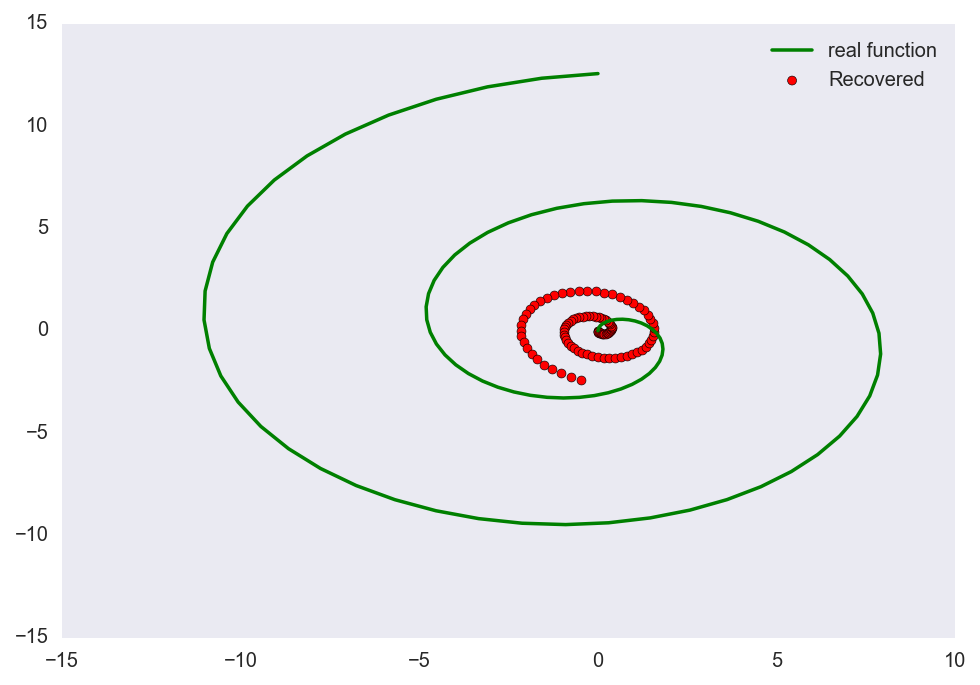

In [13]:
import scipy as sp
import scipy.optimize as opt
from numpy import log
from numpy.linalg import det, inv

def f_non_lin(x):
    val = np.ndarray((len(x), 2))
    val[:,0] = x * np.sin(x)
    val[:,1] = x * np.cos(x)
    return val

def f_lin(x, A):
    val = np.dot(x, A.T)
    return val
    
def gradient(w, *args):
    S, sigma = args
    W = w.reshape(D, W_dim)
    C = W.dot(W.T) + (sigma**2 * np.eye(W.shape[0])) 
    val = -N * (inv(C).dot(S).dot(inv(C)).dot(W) - inv(C).dot(W))
    return val.reshape(-1)

def cost_function(w, *args):
    S, sigma = args
    W = w.reshape(D, W_dim)
    C = W.dot(W.T) + (sigma**2 * np.eye(W.shape[0]))
    
    #bishop 12.44
    cost = N/2 * (D * np.log(2 * pi) + np.log(det(C)) + np.trace(inv(C).dot(S)))
    return cost

D = 10
W_dim = 2
x0 = np.random.rand(D, W_dim) # initial weights

N = 100
x = np.linspace(0, 4*pi, N) # data
N = float(N)

mu = np.zeros(D) 
A = np.random.normal(0, 1, (10, 2)) # A = 10x2
Y = f_lin(f_non_lin(x), A) # 100x10

S = 1./N * (Y - mu).T.dot(Y - mu)
sigma = 1
x_star = opt.fmin_cg(cost_function, x0, fprime=gradient, maxiter=100, args=(S, sigma))
fnonlin = f_non_lin(x)
plt.plot(fnonlin[:,0], fnonlin[:,1], 'g', label='real function')

W = x_star.reshape(D, W_dim) # 10x2
# least squares
#(X^TX)^-1 X^T y
X = np.linalg.pinv(W.T.dot(W)).dot(W.T).dot((Y - mu).T).T
plt.scatter(X[:,0],X[:,1], c='r', label='Recovered')

plt.legend()

## Question 21

Why is this the simplest model, and what does it actually imply? Discuss its implications, why is this a bad model and why is it a good model?

- - -

$\mathcal{M_0}$ is the simplest model in terms of form since it takes 0 parameters. It's a bad model since it actually knows nothing about $\mathcal{D}$ except its cardinality. It spreads the probability density uniformly over the entire dataset, which implies that it has no preference at all among the datasets. However, in terms of Occam's razor, it is quite complex since it considers all datasets. It's good at reflecting our lack of knowledge in the absence of data.

## Question 22

Explain how each separate model works. In what way is this model more or less flexible compared to $\mathcal{M_0}$? How does this model spread its probability mass over $\mathcal{D}$?

- - -

The model $\mathcal{M_1}$ divides the probability distribution according to the data it is given, but only by looking at at one axis. It's more flexible than $\mathcal{M_0}$ since it takes one parameter. It can also realize model $\mathcal{M_0}$, and this is true for each subsequent model. For example, $\mathcal{M_3}$ can take the form of $\mathcal{M_2}$ by setting the bias term to 0, and $\mathcal{M_2}$ can take the form of $\mathcal{M_1}$ by setting $\theta_1$ to 0. In terms of model complexity, $\mathcal{M_1}$ is simpler than $\mathcal{M_0}$ since it will consider less datasets.

## Question 23

How have the choices we made above restricted the distribution of the model?
What datasets are each model suited to model? What does this actually imply in terms of
uncertainty? In what way are the different models more flexible and in what way are they more
restrictive? Discuss and compare the models to each other.

- - -

The models $\mathcal{M_2}$ and $\mathcal{M_3}$ are restricted to a more narrow subset of datasets. Having more parameters causes the models to give more probability distribution to complex datasets at the cost of giving lower probability to simpler datasets. Model $\mathcal{M_2}$ & $\mathcal{M_3}$ are more flexible since they accept more parameters.

Model $\mathcal{M_2}$ & $\mathcal{M_3}$ can only find linear decision boundaries, with the difference being that $\mathcal{M_3}$ can find boundaries that does not go through the origin. This makes it the only model that can actually look at the value of the sample in the origin.

## Question 24

Explain the process of marginalisation. Discuss its implications.

- - -

Since we don't know $\theta$, we can marginalize it. By specifying a prior over $\theta$, we are expressing our uncertainty of the parameter. The evidence for $p(\mathcal{D} \mid \mathcal{M_i})$ is the weighted average of all possible $\theta$ in $p(\mathcal{D} \mid \mathcal{M_i}, \theta)$. The evidence is also called marginal likelihood, since the it can be interpreted as a likelihood function over the models where $\theta$ has been marginalized.

We can think of the evidence being the probability for a certain dataset, given a specific model whose parameters were sampled from the prior.

## Question 25

What does this choice of prior imply? How does the choice of the parameters of
the prior $\mu$ and $\Sigma$ effect the model?

- - -

\begin{multiline}
p(\theta \mid \mathcal{M_i}) = \mathcal{N} (\mu, \Sigma)
\\
\mu = 0
\\
\Sigma = \boldsymbol{I} \cdot 10^3
\end{multiline}

This prior says that the weights, $\theta$, will be centered around 0, but that we are unsure since we assume a large variance. Moreover, we presume that the variables are independent with an isotropic covariance matrix. The spread of weights will be pretty large. We will have an even spread of positive and negative samples.

## Question 26

For each model sum the evidence for the whole of $\mathcal{D}$, what numbers do you get?
Explain these numbers for all the models and relate them to each other.

- - -

The evidence for each model for the whole dataset sums up to 1. This is obvious for the first model, $\mathcal{M_0}$, since we have 512 datasets and each dataset has an evidence of $\frac{1}{512}$. 
For the three other models, $\mathcal{M_1}$, $\mathcal{M_2}$, $\mathcal{M_3}$, we get a summed evidence of 1 due to the symmetry and completeness of the dataset. There are 9 points in each dataset, and given that the prior is uniform for all datasets, the expected value of the model for a given point will be:

$$\frac{1}{1 + e^0} = 0.5$$

So for 512 datasets, and 9 point in each: $512 \cdot (\frac{1}{2})^9 = 1$

## Question 27

Plot the evidence over the whole dataset for each model. The x-axis index the different instances in $\mathcal{D}$ and each models evidence is on the y-axis. How do you interpret this?
Relate this to the parametrisation of each model.

- - -

$\mathcal{M_0}$ spreads its probability distribution evenly across all datasets, while $\mathcal{M_1}$, $\mathcal{M_2}$ and $\mathcal{M_3}$ cover fewer. $\mathcal{M_1}$ and $\mathcal{M_2}$ can capture linear boundaries that intersects the origin, whereas $\mathcal{M_3}$ can capture linear boundaries that dont go through origin.

In [14]:
def create_index_set(evidence):
    dist = np.zeros([evidence.shape[0],evidence.shape[0]])
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            dist[i,j] = evidence[i]-evidence[j]
            if i==j:
                dist[i,j] = pow(10,4)

    L = [];
    D = np.arange(evidence.shape[0]).tolist()
    ind = evidence.argmin()
    L.append(ind)
    D.remove(ind)
    while D:
        N = []
        for i in range(len(D)):
            ind = dist[D[i],D].argmin()
            if D[ind]==L[-1]:
                N.append(D[ind])
        if not N:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmin()])
        D.remove(L[-1])
    return L

In [15]:
import itertools
x_data = list(itertools.product([-1, 0, 1], [-1, 0, 1]))
labels = list(itertools.product([-1, 1], repeat=9))
data = [np.array(zip(x_data, y)) for y in labels]

In [16]:
def model0(data, theta):
    return 1./512

def model1(data, theta):
    return reduce(lambda prev, (x, y): prev * 1. / (1 + np.exp(-y * theta[0] * x[0])), data, 1)

def model2(data, theta):
    return reduce(lambda prev, (x, y): prev * 1. / (1 + np.exp(-y * (theta[0] * x[0] + theta[1] * x[1]))), data, 1)

def model3(data, theta):
    return reduce(lambda prev, (x, y): prev * 1. / (1 + np.exp(-y * (theta[0] * x[0] + theta[1] * x[1] + theta[2]))), data, 1)

In [130]:
def sample_prior(mu=[0,0,0], cov=np.eye(3) * 10**3):
    return np.random.multivariate_normal(mu, cov)
print sample_prior()

[-17.2425242   10.11387326 -25.45823311]


In [131]:
def monte_carlo_old(model, data, s=100):
    priors = [(i, sample_prior()) for i in xrange(s)]
    return np.sum(model(data, prior) for (_, prior) in priors) / float(s)
# evidence = np.array([[monte_carlo_old(model, d) for d in data[:]] for model in models])

In [132]:
def monte_carlo(model, data, priors):
    return np.sum(model(data, prior) for prior in priors) / float(len(priors))

In [141]:
def get_evidence_index_for_models(data, mu, cov, nr=len(data), iterations=100):
    models = [model0, model1, model2, model3]
    priors = [sample_prior(mu, cov) for _ in xrange(iterations)]
    evidence = np.array([[monte_carlo(model, d, priors) for d in data[:nr]] for model in models])
    return (evidence, create_index_set(np.sum(evidence, axis=0)))

In [142]:
models = [model0, model1, model2, model3]

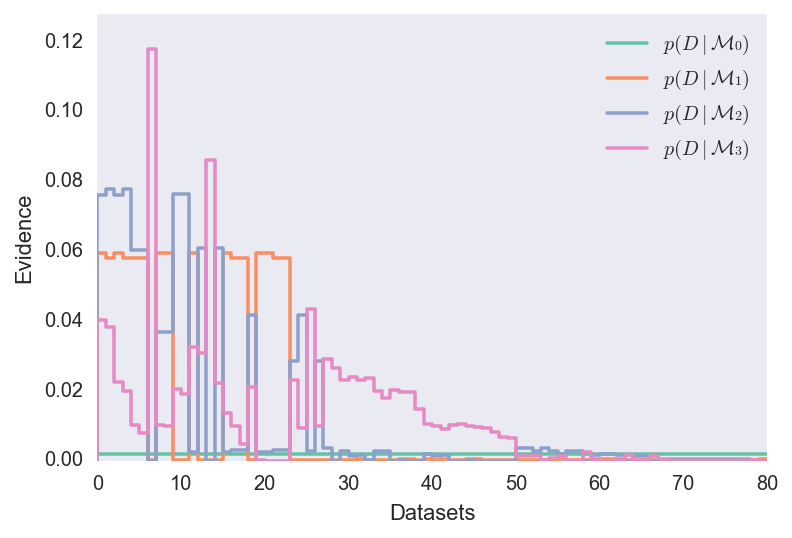

In [175]:
fig, axarr = plt.subplots(1,1, figsize=(6,4))

mu = [0,0,0]
cov = np.eye(3) * 10**3
evidence, index = get_evidence_index_for_models(data, mu=mu, cov=cov, iterations=100)

for i in range(len(models)):
    axarr.axis([0, 80, 0, np.max(evidence) + 0.01])
    axarr.set_ylabel('Evidence')
    axarr.set_xlabel('Datasets')
    c = sns.color_palette("Set2", 4)[i]
    axarr.plot(evidence[i, index], c=c, drawstyle='steps', label='$p(D \mid \mathcal{M_%d})$' % i)
    axarr.legend()

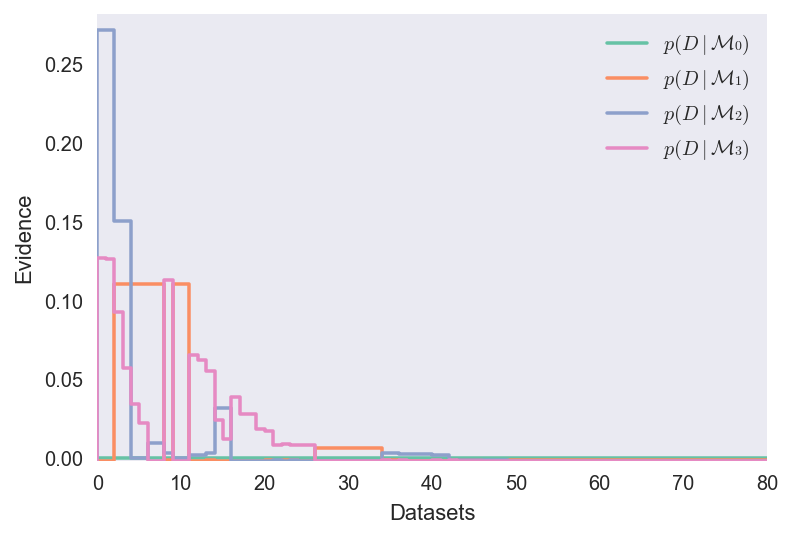

In [177]:
fig, axarr = plt.subplots(1,1, figsize=(6,4))

mu = [50,50,0]
cov = np.eye(3) * 10**3
evidence, index = get_evidence_index_for_models(data, mu=mu, cov=cov)
nr = 80
evidence_partial, index_partial = get_evidence_index_for_models(data, mu=mu, cov=cov, nr=nr)
for i in range(len(models)):
    axarr.axis([0, 80, 0, np.max(evidence) + 0.01])
    axarr.set_ylabel('Evidence')
    axarr.set_xlabel('Datasets')
    c = sns.color_palette("Set2", 4)[i]
    axarr.plot(evidence[i, index], c=c, drawstyle='steps', label='$p(D \mid \mathcal{M_%d})$' % i)
    axarr.legend()

[[ 1000.          -355.54920262   444.74059575]
 [ -355.54920262  1000.          -756.55658402]
 [  444.74059575  -756.55658402  1000.        ]]


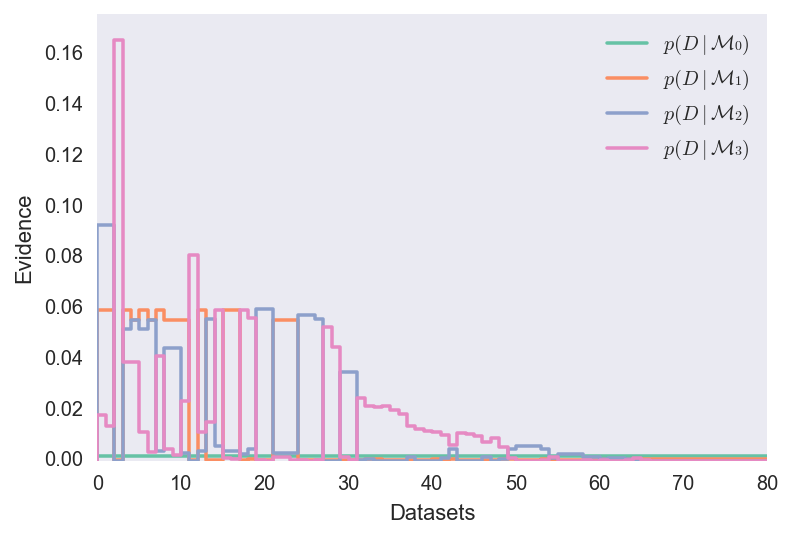

In [173]:
mu = [0,0,0]
K = np.random.rand(3,3) * 25
cov = K.dot(K.T)
np.fill_diagonal(cov, 10**3)
x=np.random.normal(size=3)
y=np.random.normal(size=3)
z = np.vstack((x, y))
cov = np.cov(z.T) * 500
np.fill_diagonal(cov, 10**3)
print cov
fig, axarr = plt.subplots(1,1, figsize=(6,4))

evidence, index = get_evidence_index_for_models(data, mu=mu, cov=cov, iterations=100)
c = sns.color_palette("Set2", 4)
for i in range(len(models)):
    axarr.axis([0, 80, 0, np.max(evidence) + 0.01])
    axarr.set_ylabel('Evidence')
    axarr.set_xlabel('Datasets')
    axarr.plot(evidence[i, index], c=c[i], drawstyle='steps', label='$p(D \mid \mathcal{M_%d})$' % i)
    axarr.legend()

## Question 28

Find using `np.argmax` and `np.argmin` which part of the $\mathcal{D}$ that is given most
and least probability mass by each model. Plot the data-sets which are given the highest and
lowest evidence for each model. Discuss these results, does it make sense?

- - -

The first model will give the first or last dataset the most probability mass.
In dataset (c) the decision boundary is a function of $x_1$ but not $x_2$. Model $\mathcal{M}_1$ is a simple model that captures such decision boundaries, so it makes sense that it gives (c) high probability. Due to rotation invariance, the dataset (e) is identical to dataset (c) under model $\mathcal{M_2}$.
The best dataset for $\mathcal{M_3}$ is one-sided, which is sensible since it's the only model to have a bias term $\theta$ so that it can have a decision boundary that does not go through the origin.

In [26]:
def plot_data(data, ax):
    # draw the grid
    for x in range(4):
        ax.plot([x-1.5, x-1.5], [-1.5,1.5], 'w')
    for y in range(4):
        ax.plot([-1.5, 1.5], [y-1.5, y-1.5], 'w')

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    
    positive = data[:, 1] == 1
    negative = data[:, 1] == -1
    
    # print positive points
    X = np.array([np.array(x[0]) for x in data[positive]])
    if len(X):
        ax.plot(X[:, 0], X[:, 1], '+', 
                markersize=30, markeredgecolor=(50./255,200./255,70./255), label='positive', markeredgewidth=3)
        
    # plot negative points
    X = np.array([np.array(x[0]) for x in data[negative]])
    if len(X):
        ax.plot(X[:, 0], X[:, 1], 'o', 
                markersize=30, markeredgecolor=(250./255, 100./255, 100./255), markerfacecolor=(250./255,100./255,100./255), markeredgewidth=2, label='negative')

max: [  0 448 480 511]
min: [  0   0   5 399]


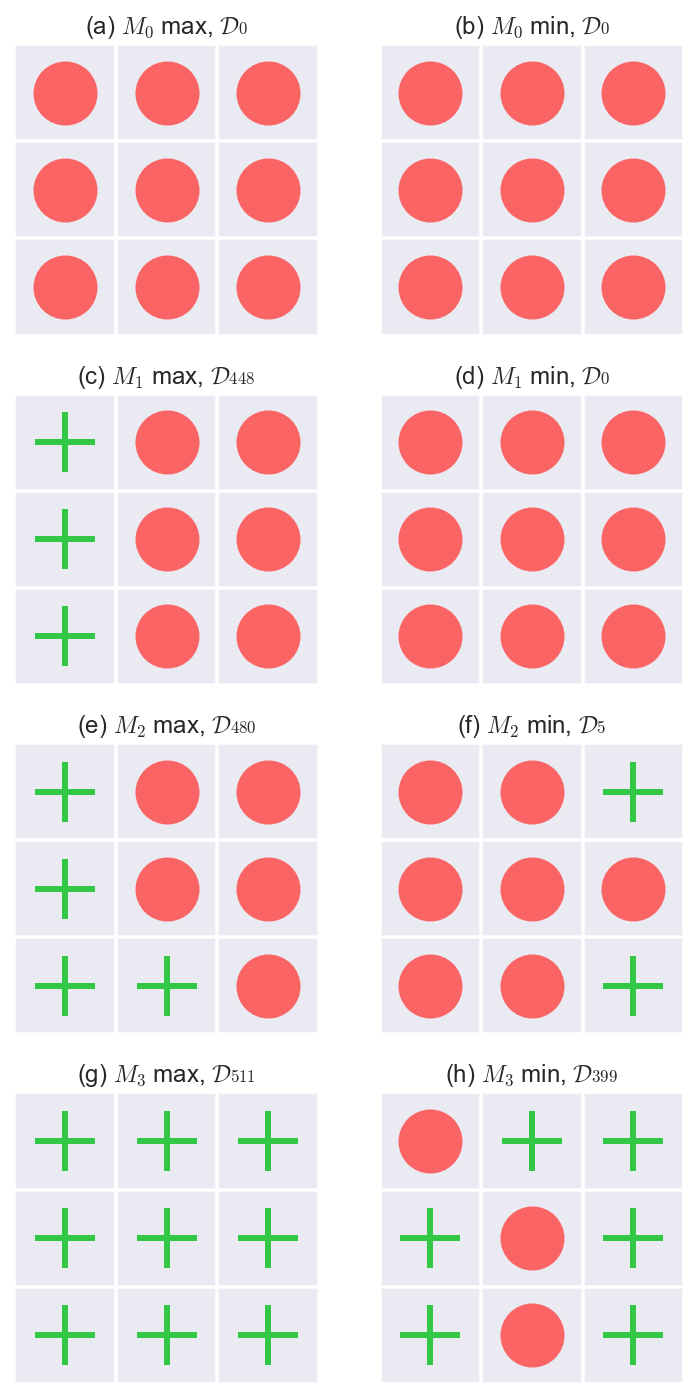

In [27]:
mu = [0,0,0]
cov = np.eye(3) * 10**3
evidence, index = get_evidence_index_for_models(data, mu=mu, cov=cov)

e_max = np.argmax(evidence, axis=1)
e_min = np.argmin(evidence, axis=1)

print 'max: %s' % e_max
print 'min: %s' % e_min

letters = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
fig, axarr = plt.subplots(4,2, figsize=(6,12), gridspec_kw = {'width_ratios':[1, 1]})
# plt.tight_layout()
for i in xrange(len(models)):
    ax = axarr[i, 0]
    ax.set_title('%s $M_%d$ max, $\mathcal{D_{%s}}$' % (letters[2 * i], i, e_max[i]))
#     ax.set_xlabel(letters[2 * i])
    plot_data(data[e_max[i]], ax=ax)
    ax = axarr[i, 1]
    ax.set_title('%s $M_%d$ min, $\mathcal{D_{%s}}$' % (letters[2 * i + 1], i, e_min[i]))
#     ax.set_xlabel(letters[2 * i + 1])
    plot_data(data[e_min[i]], ax=ax)

[  7  39  11  95 504 219 447  75 511   0]


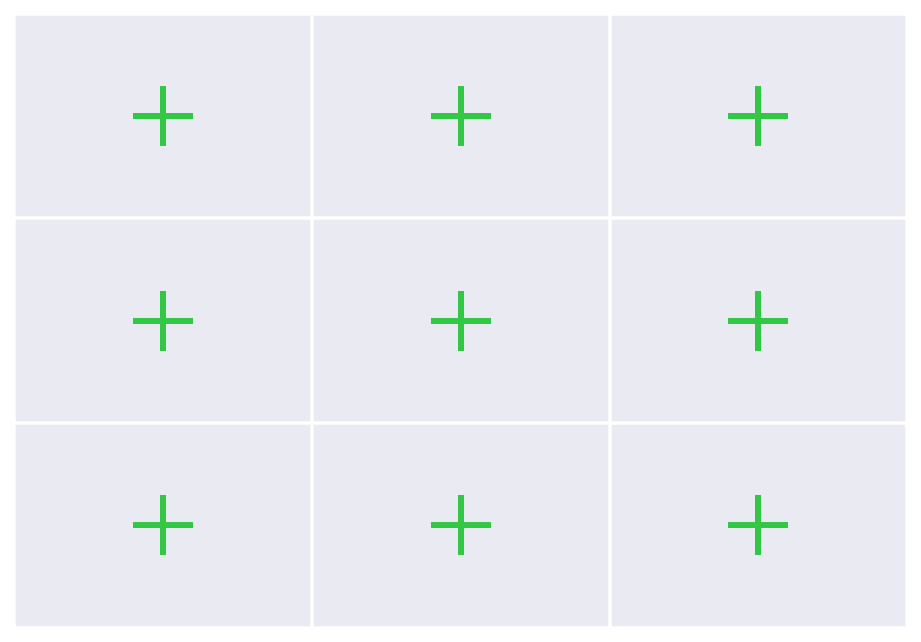

In [28]:
mu = [5,5,5]
cov = np.eye(3) * 10**3
evidence, index = get_evidence_index_for_models(data, mu=mu, cov=cov)
fig, ax = plt.subplots()
maxes = np.argsort(evidence[3])[-10:]
print maxes
plot_data(data[maxes[-2]], ax)

# Question 29
What is the effect of the prior $p(\theta)$.
- What happens if we change its parameters?
- What happens if we use a non-diagonal covariance matrix for the prior?
- Alter the prior to have a non-zero mean, such that $\mu = (5, 5)$?
- Redo evidence plot for these and explain the changes compared to using zero-mean

- - -

When using a non-diagonal covariance matrix, the parameters $\theta_0$, $\theta_1$ and $\theta_2$ will have some correlation. For example, if $\theta_0$ correlates positively with $\theta_1$, it will favor certain models over others. This is seen in the plots, where a few datasets have a high evidence.

Plotting the evidence for a prior with non-zero mean, one can see that the majority of probability mass is distributed to a few datasets. This seems sensible because some datasets have decision boundaries for which the parameters are zero.